# K-Nearest Neighbor

K-nearest neighbours is a non-linear instance-based learner used for classification and regression problems. It utilizes a distance based metric to identify similarity between datapoints. Predictions are made through a majority vote amongst the nearest neighbours of the instance.

The training process involves selecting the hyperparameter 'K'. The model then calculates the Euclidean distance between an instance and all other instances in the dataset. Once the K-nearest neighbours are identified, the model counts the number of neighbours within each category. For classification problems, the new observation is assigned to the category with the highest number of neighbours (or votes). For regression problems a prediction is made by computing the mean of the nearest neighbours.

Commonly used metrics for continuous variables are Manhattan and Euclidean distance while hamming distance is used for categorical variables.

   $$Euclidean Distance = √[ (x2 – x1)^2 + (y2 – y1)^2]$$ 
    
   $$Manhatten Distance = √[ |x2 – x1| + |y2 – y1|]$$ 
   

 
# Pre-processing

-  Since KNN uses a distance based metric, it is important to perform feature scaling.

-  Choosing K is important. Smaller K's lead to low bias and high variance. K could be considered a hyperparameter that tunes the bias-variance tradeoff.


# Pros and Cons
 
**Pros**
 
- Very easy to interpret the how the model makes predictions.

- It is nonparametric and non-linear and therefore works well for complex datasets.

**Cons**

-  KNN becomes extremely slow at making predictions as the size of the dataset increases. This is because it memorizes the training set and makes predictions by iterating over all pairs of points in the dataset.



# 1) Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Import Data
df = pd.read_csv('LungCapData.csv')
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


# 2) Preprocessing

In [3]:
# Predictors and Target
X = df.drop(columns = ['LungCap'])
y = df['LungCap']

# Instantiate one-hot encoder
ohe = OneHotEncoder()

# columns to be one hot encoded
ct = make_column_transformer(

    (ohe, ['Smoke', 'Gender', 'Caesarean']),
    remainder = 'passthrough')

# predictors and target variable
X = np.array(ct.fit_transform(X))
y = np.array(y)

# Checck input and target variable shape
X.shape, y.shape

((725, 8), (725,))

In [4]:
# Training and Testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 911)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('Standardized feature Mean:',  X_train.mean().round())
print('Standardized feature SD :',   X_train.std().round())

Standardized feature Mean: 0.0
Standardized feature SD : 1.0


# 3. Training

In [5]:
# Training the K-NN model on the Training set
knn = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsRegressor()

# 4. Testing

In [6]:
# Predicting the Test set results
y_pred = knn.predict(X_test)

# Mean squared error
print('Mean Squared Error :', mean_squared_error(y_test, y_pred))

Mean Squared Error : 1.6661448275862065


# 5. Cross Validation

In [7]:
# 10 fold cross validation
r2 = cross_val_score(estimator = knn,
                             X = X,
                             y = y,
                             cv = 10,
                             scoring = 'r2')

# Cross validation accuracy and standard deviation
print(r2)
print("R2: {:.3f} %".format(r2.mean()*100))
print("Standard Deviation: {:.3f} %".format(r2.std()*100))

[0.82202942 0.80652313 0.86056225 0.74426819 0.81627324 0.84303709
 0.82362129 0.83475644 0.84534782 0.73995682]
R2: 81.364 %
Standard Deviation: 3.871 %


Text(0, 0.5, 'Cross-Validated R2')

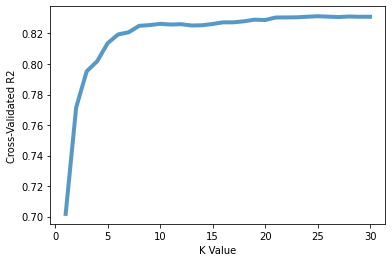

In [8]:
# Tuning K
k_values = range(1,31)
k_score = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(estimator = knn,
                             X = X,
                             y = y,
                             cv = 10,
                             scoring = 'r2')
    k_score.append(scores.mean())

    
plt.plot(k_values, k_score, 
            linewidth = 4,
            alpha = 0.75, )
plt.xlabel('K Value')
plt.ylabel('Cross-Validated R2')